# model building pipeline
## things to do
* read results file.

In [12]:
import Utils
import EdaTools

## setup Parameters

In [2]:
new_sim = Utils.PuckSim(
    sim_name="MM013", 
    cfile_template_name='puck_macro_template.msg.cfile', 
    keyword_main_template_name='mainTemplate.k',
    template_dir=None, 
    sim_dir="/media/martin/Stuff/research/MaterailModels"
)

## update cfile parameters and make the geometry keyword file

In [3]:
new_sim.setup_simulation(
    radius=0.01, length=0.012, num_elements=201)

## Run lsrun 
working from cmd
/home/martin/Programs/LSTC/LSDYNA/ls-dyna_smp_s_r1010_x64_suse11_pgi165 i=/media/martin/Stuff/research/MaterailModels/MM012/MM012main.k ncpu=8 memory=1000m jobid=MM012_job02

In [ ]:
new_sim.run_simulation()

In [ ]:
print(new_sim.sim_output)

## Import existing K.File

In [13]:
new_sim.import_geometry_keyword()
surf_node_ids = new_sim.get_puck_surface_nodes()

## Plot the surface nodes

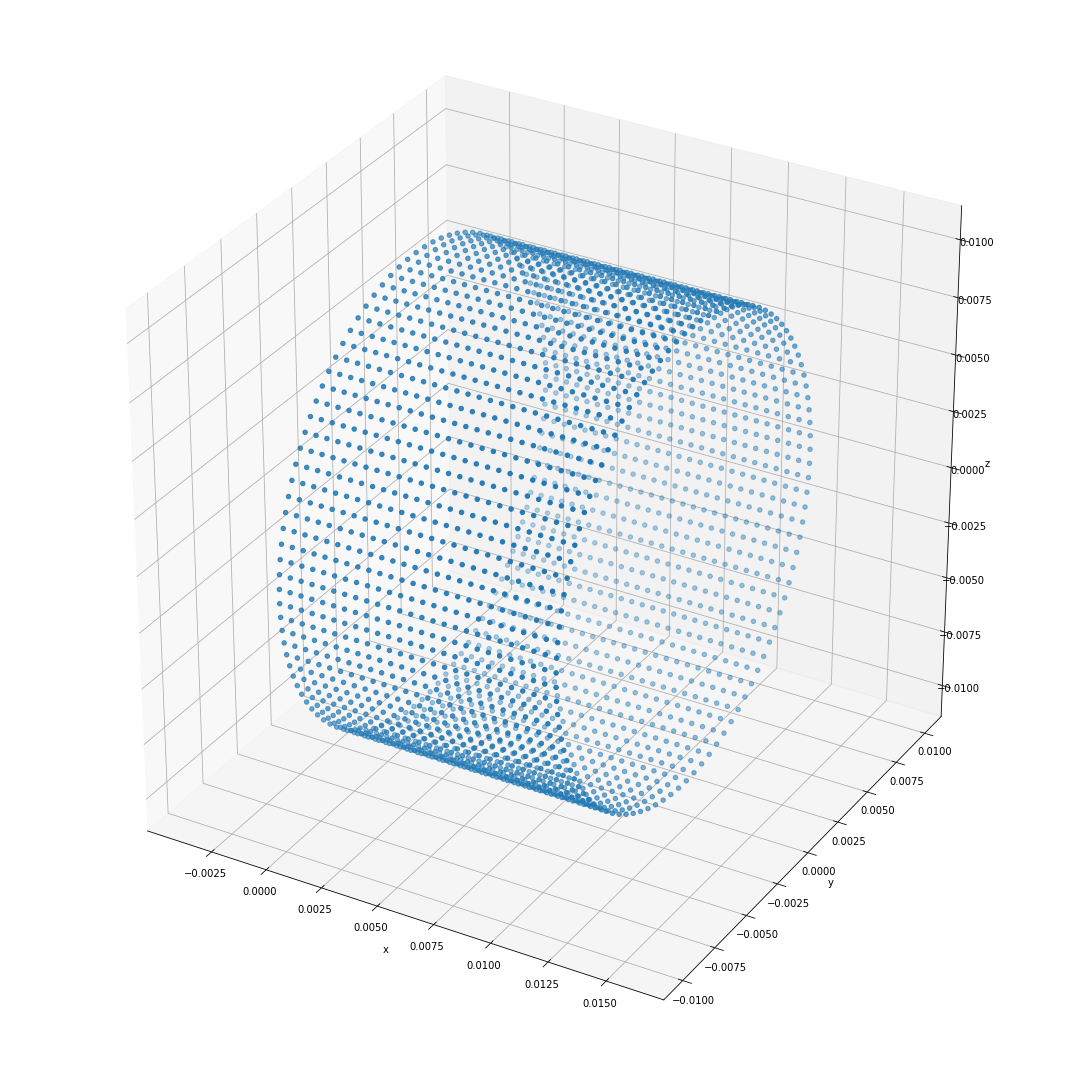

In [14]:
EdaTools.plot_3d(
    Utils.nodes_to_coord_array(
        new_sim.keyword_geom.get_nodeByID(
            surf_node_ids)))